In [4]:
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [5]:
df = pd.read_csv("emotion_dataset.csv")

In [6]:
df

Emotion                                               Text
0       neutral                                             Why ? 
1           joy    Sage Act upgrade on my to do list for tommorow.
2       sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3           joy   Such an eye ! The true hazel eye-and so brill...
4           joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...
...         ...                                                ...
34787  surprise  @MichelGW have you gift! Hope you like it! It'...
34788       joy  The world didnt give it to me..so the world MO...
34789     anger                           A man robbed me today . 
34790      fear  Youu call it JEALOUSY, I call it of #Losing YO...
34791   sadness  I think about you baby, and I dream about you ...

[34792 rows x 2 columns]

C:\Users\maruf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


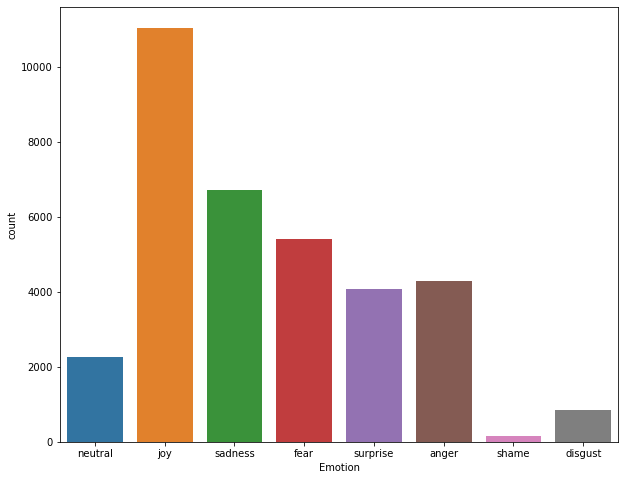

In [7]:
plt.figure(figsize = (10, 8))
sns.countplot(df['Emotion'])
plt.show()

In [8]:
import neattext.functions as nfx
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [9]:
df['clean_text']=df['Text'].apply(nfx.remove_stopwords)
df['clean_text']=df['Text'].apply(nfx.remove_userhandles)
df['clean_text']=df['Text'].apply(nfx.remove_punctuations)
df['clean_text1']=df['Text'].apply(nfx.remove_special_characters)

In [10]:
df

Emotion                                               Text  \
0       neutral                                             Why ?    
1           joy    Sage Act upgrade on my to do list for tommorow.   
2       sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...   
3           joy   Such an eye ! The true hazel eye-and so brill...   
4           joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   
...         ...                                                ...   
34787  surprise  @MichelGW have you gift! Hope you like it! It'...   
34788       joy  The world didnt give it to me..so the world MO...   
34789     anger                           A man robbed me today .    
34790      fear  Youu call it JEALOUSY, I call it of #Losing YO...   
34791   sadness  I think about you baby, and I dream about you ...   

                                              clean_text  \
0                                                  Why     
1         Sage Act upgrade on my to do list for tommorow   
2      ON THE WAY TO MY HOMEGIRL BABY FUNERAL MAN I H...   
3       Such an eye  The true hazel eyeand so brillia...   
4      @Iluvmiasantos ugh babe hugggzzz for u   babe ...   
...                                                  ...   
34787  @MichelGW have you gift Hope you like it Its h...   
34788  The world didnt give it to meso the world MOST...   
34789                            A man robbed me today     
34790     Youu call it JEALOUSY I call it of #Losing YOU   
34791  I think about you baby and I dream about you a...   

                                             clean_text1  
0                                                  Why    
1         Sage Act upgrade on my to do list for tommorow  
2      ON THE WAY TO MY HOMEGIRL BABY FUNERAL MAN I H...  
3       Such an eye  The true hazel eyeand so brillia...  
4      Iluvmiasantos ugh babe hugggzzz for u   babe n...  
...                                                  ...  
34787  MichelGW have you gift Hope you like it Its ha...  
34788  The world didnt give it to meso the world MOST...  
34789                            A man robbed me today    
34790      Youu call it JEALOUSY I call it of Losing YOU  
34791  I think about you baby and I dream about you a...  

[34792 rows x 4 columns]

In [11]:
Xfeatures = df['clean_text1']
ylabels = df['Emotion']

In [12]:
Xfeatures

0                                                    Why  
1           Sage Act upgrade on my to do list for tommorow
2        ON THE WAY TO MY HOMEGIRL BABY FUNERAL MAN I H...
3         Such an eye  The true hazel eyeand so brillia...
4        Iluvmiasantos ugh babe hugggzzz for u   babe n...
                               ...                        
34787    MichelGW have you gift Hope you like it Its ha...
34788    The world didnt give it to meso the world MOST...
34789                              A man robbed me today  
34790        Youu call it JEALOUSY I call it of Losing YOU
34791    I think about you baby and I dream about you a...
Name: clean_text1, Length: 34792, dtype: object

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=3)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()

xtrain=cv.fit_transform(x_train)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lr= LogisticRegression()

In [17]:
xtrain
y_train

3242        fear
18069    neutral
7140         joy
19711      anger
31653    sadness
          ...   
25365    sadness
25544        joy
11513       fear
1688        fear
5994         joy
Name: Emotion, Length: 24354, dtype: object

In [18]:
lr.fit(xtrain,y_train)

C:\Users\maruf\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
xtest=cv.transform(x_test)
xtest

<10438x32922 sparse matrix of type '<class 'numpy.int64'>'
	with 131201 stored elements in Compressed Sparse Row format>

In [20]:
y_test

9441         joy
9135         joy
17684        joy
6590        fear
18323    sadness
          ...   
8508     sadness
32898      anger
2895       anger
12587        joy
4606       anger
Name: Emotion, Length: 10438, dtype: object

In [21]:
lr.score(xtrain,y_train)

0.9112671429744601

In [22]:
xtest.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
lr.score(xtest,y_test)

0.6464840007664303

In [24]:
pred1 = lr.predict(xtest)
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

       anger       0.62      0.56      0.59      1212
     disgust       0.46      0.21      0.28       239
        fear       0.74      0.68      0.71      1663
         joy       0.66      0.78      0.71      3330
     neutral       0.62      0.77      0.69       676
     sadness       0.59      0.59      0.59      2004
       shame       0.97      0.67      0.80        49
    surprise       0.64      0.44      0.52      1265

    accuracy                           0.65     10438
   macro avg       0.66      0.59      0.61     10438
weighted avg       0.64      0.65      0.64     10438



In [25]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(lr,xtrain, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
n_scores
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
n_scores


Accuracy: 0.633 (0.008)


array([0.62889984, 0.62397373, 0.63505747, 0.63300493, 0.63203285,
       0.63572895, 0.63367556, 0.63531828, 0.63942505, 0.63737166,
       0.65681445, 0.62807882, 0.62848933, 0.63095238, 0.63819302,
       0.6275154 , 0.63326489, 0.62176591, 0.63696099, 0.62669405,
       0.62233169, 0.62807882, 0.62972085, 0.62397373, 0.63531828,
       0.65379877, 0.62258727, 0.61930185, 0.63655031, 0.64065708])

In [26]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(lr, xtest, y_test, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
n_scores
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
n_scores

Accuracy: 0.591 (0.014)


array([0.57758621, 0.58524904, 0.61015326, 0.60823755, 0.5967433 ,
       0.57375479, 0.5967433 , 0.59770115, 0.58293384, 0.58676894,
       0.59003831, 0.61111111, 0.57662835, 0.59578544, 0.54885057,
       0.58716475, 0.59003831, 0.59099617, 0.61169703, 0.59539789,
       0.58716475, 0.57375479, 0.5862069 , 0.56417625, 0.59961686,
       0.59195402, 0.60057471, 0.6091954 , 0.60115053, 0.60115053])

In [27]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(xtrain, y_train)

MultinomialNB()

In [28]:
classifier.score(xtrain,y_train)

0.7089184528208918

In [29]:
classifier.score(xtest,y_test)

0.5722360605479977

In [30]:
pred2 = classifier.predict(xtest)
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

       anger       0.62      0.50      0.55      1212
     disgust       0.60      0.01      0.02       239
        fear       0.77      0.56      0.65      1663
         joy       0.51      0.89      0.65      3330
     neutral       0.85      0.12      0.21       676
     sadness       0.56      0.55      0.56      2004
       shame       0.00      0.00      0.00        49
    surprise       0.64      0.22      0.33      1265

    accuracy                           0.57     10438
   macro avg       0.57      0.36      0.37     10438
weighted avg       0.61      0.57      0.54     10438



C:\Users\maruf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
from sklearn.svm import SVC

In [32]:
svm=SVC()

In [33]:
svm.fit(xtrain,y_train)

SVC()

In [34]:
svm.score(xtrain,y_train)

0.8526730721852673

In [35]:
pred3 = svm.predict(xtest)
print(classification_report(y_test, pred3))

              precision    recall  f1-score   support

       anger       0.65      0.49      0.56      1212
     disgust       0.75      0.01      0.02       239
        fear       0.81      0.59      0.68      1663
         joy       0.55      0.86      0.67      3330
     neutral       0.67      0.75      0.71       676
     sadness       0.59      0.56      0.58      2004
       shame       1.00      0.14      0.25        49
    surprise       0.75      0.28      0.41      1265

    accuracy                           0.62     10438
   macro avg       0.72      0.46      0.49     10438
weighted avg       0.65      0.62      0.60     10438



In [36]:
svm.score(xtest,y_test)

0.6168806284728875

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dt=DecisionTreeClassifier()

In [39]:
dt.fit(xtrain,y_train)

DecisionTreeClassifier()

In [40]:
dt.score(xtrain,y_train)

0.998357559333169

In [41]:
dt.score(xtest,y_test)

0.5194481701475379

In [42]:
pred4 = dt.predict(xtest)
print(classification_report(y_test, pred4))

              precision    recall  f1-score   support

       anger       0.46      0.42      0.44      1212
     disgust       0.19      0.12      0.15       239
        fear       0.66      0.59      0.62      1663
         joy       0.56      0.63      0.59      3330
     neutral       0.47      0.67      0.55       676
     sadness       0.47      0.46      0.46      2004
       shame       0.68      0.39      0.49        49
    surprise       0.41      0.32      0.36      1265

    accuracy                           0.52     10438
   macro avg       0.49      0.45      0.46     10438
weighted avg       0.52      0.52      0.51     10438



In [43]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(dt,xtrain, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
n_scores
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
n_scores

Accuracy: 0.510 (0.011)


array([0.47331691, 0.5180624 , 0.49835796, 0.51190476, 0.49897331,
       0.50677618, 0.50349076, 0.51991786, 0.51540041, 0.5137577 ,
       0.52873563, 0.51559934, 0.51190476, 0.51559934, 0.50020534,
       0.51047228, 0.51581109, 0.52525667, 0.50882957, 0.49445585,
       0.52134647, 0.51559934, 0.50164204, 0.50328407, 0.51950719,
       0.52854209, 0.49650924, 0.51663244, 0.50143737, 0.5063655 ])

In [44]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(dt, xtest, y_test, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
n_scores
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
n_scores

Accuracy: 0.464 (0.014)


array([0.47318008, 0.45689655, 0.47605364, 0.46360153, 0.47988506,
       0.45498084, 0.47222222, 0.46168582, 0.44774688, 0.47363375,
       0.4664751 , 0.48371648, 0.46934866, 0.46264368, 0.43103448,
       0.47509579, 0.46360153, 0.44636015, 0.46500479, 0.47746884,
       0.43678161, 0.45402299, 0.48371648, 0.4454023 , 0.4894636 ,
       0.46072797, 0.47030651, 0.46168582, 0.4611697 , 0.44295302])

In [45]:
from sklearn.naive_bayes import BernoulliNB


In [46]:
bn=BernoulliNB()

In [47]:
bn.fit(xtrain,y_train)


BernoulliNB()

In [48]:
bn.score(xtrain,y_train)


0.6129588568612959

In [49]:
bn.score(xtest,y_test)

0.5090055566200421

In [58]:
import eli5

eli5.show_weights(lr,top=20)

In [60]:
eli5.show_weights(dt,top=20)

# BEST PERFORMER IN SUPERVISED MACHINE LEARNING
#LOGISTIC REGRESSION 
#TRAINING RESULT
#TESTING RESULT 
#CROSS-VALIDATION